In [356]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [357]:
train = pd.read_csv('train.csv', header= 'infer')
test = pd.read_csv('test.csv', header= 'infer')
gender_sub = pd.read_csv('gender_submission.csv', header = 'infer')

In [358]:
print(train.describe())
print(train.isnull().sum())
print(test.isnull().sum())

train_xlabel = train.drop(['Cabin', 'Embarked', 'PassengerId', 'Survived', 'Name', 'Ticket'], axis = 1)
train_xlabel.head()

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex  

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500


In [359]:
test_xlabel = test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis= 1)
test_xlabel.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,34.5,0,0,7.8292
1,3,female,47.0,1,0,7.0000
2,2,male,62.0,0,0,9.6875
3,3,male,27.0,0,0,8.6625
4,3,female,22.0,1,1,12.2875


In [346]:
train.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [360]:
train_ylabel = train.Survived


In [361]:
train_xlabel.isnull().sum()
train_xlabel.Age.fillna(29, inplace= True)
test_xlabel.isnull().sum()
test_xlabel.Age.fillna(30, inplace= True)
test_xlabel.Fare.fillna(36, inplace= True)

In [362]:
train_xlabel.isnull().sum()
test_xlabel.isnull().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [350]:
train_xlabel['Sex'] = train_xlabel['Sex'].astype('category')
test_xlabel['Sex'] = test_xlabel['Sex'].astype('category')

In [351]:
train_xlabel.dtypes

Pclass       int64
Sex       category
Age        float64
SibSp        int64
Parch        int64
Fare       float64
dtype: object

In [352]:
test_xlabel.dtypes

Pclass       int64
Sex       category
Age        float64
SibSp        int64
Parch        int64
Fare       float64
dtype: object

In [363]:
gender_sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


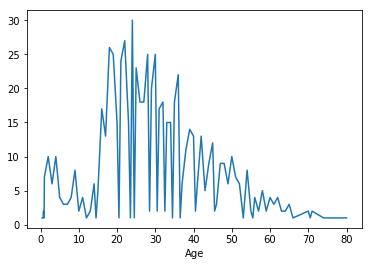

In [364]:

t = train.groupby(['Age']).size()

t.plot(x = 'Age', y = 'Survived')

In [365]:
print(train.groupby('Age').size())
print(train.shape[0])


Age
0.42      1
0.67      1
0.75      2
0.83      2
0.92      1
1.00      7
2.00     10
3.00      6
4.00     10
5.00      4
6.00      3
7.00      3
8.00      4
9.00      8
10.00     2
11.00     4
12.00     1
13.00     2
14.00     6
14.50     1
15.00     5
16.00    17
17.00    13
18.00    26
19.00    25
20.00    15
20.50     1
21.00    24
22.00    27
23.00    15
         ..
44.00     9
45.00    12
45.50     2
46.00     3
47.00     9
48.00     9
49.00     6
50.00    10
51.00     7
52.00     6
53.00     1
54.00     8
55.00     2
55.50     1
56.00     4
57.00     2
58.00     5
59.00     2
60.00     4
61.00     3
62.00     4
63.00     2
64.00     2
65.00     3
66.00     1
70.00     2
70.50     1
71.00     2
74.00     1
80.00     1
Length: 88, dtype: int64
891


In [366]:
train_ylabel.dtypes

dtype('int64')

In [367]:
train_xlabel['Sex'] = train_xlabel['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [368]:
classifier = LogisticRegression()

In [369]:
classifier.fit(train_xlabel, train_ylabel)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [371]:
test_xlabel['Sex'] = test_xlabel['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [373]:
predicted_y = classifier.predict(test_xlabel)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
